<a href="https://colab.research.google.com/github/elhamod/BA820/blob/main/Hands-on/03-dimensionality-reduction/Dimensionality_Reduction_Hands_on.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Course: BA820 - Unsupervised and Unstructured ML**

**Notebook created by: Mohannad Elhamod**

#Food Nutrients Analysis

In this notebook, we will try to analyze the nutrients found in the [food in Google's cafeterias](https://huggingface.co/datasets/mmathys/food-nutrients).

We will see how to apply dimensionality reduction, and how that could help with downstream tasks, such as classification and clustering.

## Load the data

Let's load the datasets and see what information it provides. (this may take a minute or two).

In [30]:
import pandas as pd

url = "https://drive.google.com/uc?export=download&id=1dwtqk2rlcouemYn7W2HES3aa_322dXFg"


# Read the CSV file into a DataFrame and make some edits.
df = pd.read_csv(url, index_col=0)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3260 entries, 0 to 3259
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ingredients     3260 non-null   object 
 1   total_calories  3260 non-null   float64
 2   total_mass      3260 non-null   float64
 3   total_fat       3260 non-null   float64
 4   total_carb      3260 non-null   float64
 5   total_protein   3260 non-null   float64
dtypes: float64(5), object(1)
memory usage: 178.3+ KB


##EDA

We have some information on the ingrediants, and some nutrition values, such as protien, fat, etc.

Let's remove the features we don't care about and do some preprocessing.

In [32]:
# A separate dataframe just with the numeric values.
df_numeric = df.drop("ingredients", axis=1)

In [33]:
df_numeric

,total_calories,total_mass,total_fat,total_carb,total_protein
0,41.399998,36.0,3.852000,2.268000,0.288000
1,6.440000,23.0,0.092000,1.219000,0.506000
2,71.299995,62.0,6.634000,3.906000,0.496000
3,27.520000,64.0,0.192000,5.760000,2.176000
4,4.480000,28.0,0.056000,0.952000,0.196000
...,...,...,...,...,...
3255,55.800003,268.0,0.692000,10.969999,4.532000
3256,93.400002,348.0,0.852000,19.770000,7.172000
3257,443.199982,560.0,8.483999,19.770000,72.892006
3258,743.760010,594.0,42.484001,19.770000,72.891998


Let's see how these dimensions interact.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning:

Ignoring `palette` because no `hue` variable has b

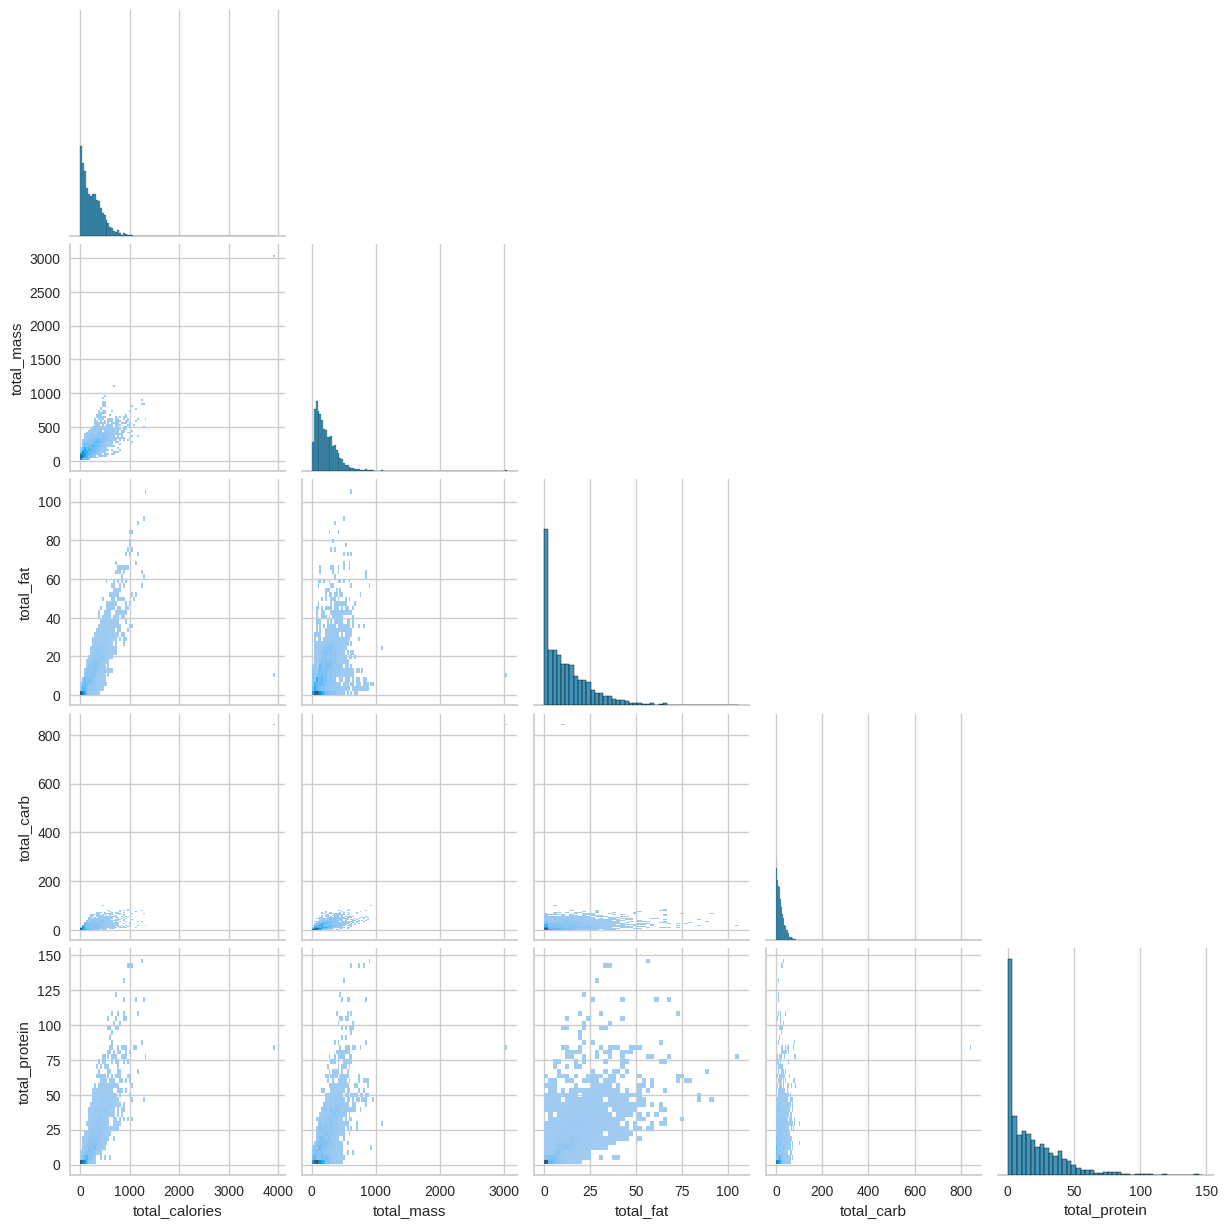

In [34]:
import seaborn as sns

sns.pairplot(df, kind="hist", corner=True, palette="Set2")

**Note:** Once you do outlier removal. Maybe rerun the pairplot with the filtered dataframe (i.e. with valid indices applied). Do you see visualization improvements?

<Axes: >

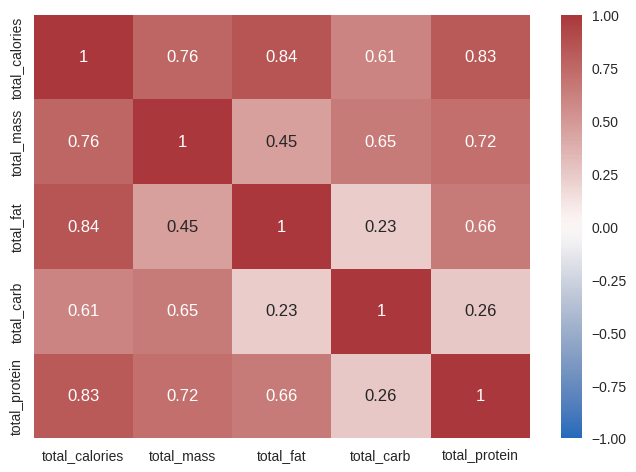

In [35]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="vlag" , vmin=-1, vmax=1)

## Dimentionality Reduction with PCA

Let's start with PCA, assuming features may align linearly.

First we need to normalize the data.

In [36]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
normalized_data = sc.fit_transform(df_numeric)
normalized_data

array([[-0.97353507, -1.10914212, -0.65682573, -0.79293827, -0.88449092],
       [-1.13274783, -1.18965598, -0.93483339, -0.84149589, -0.87361411],
       [-0.83736626, -0.94811439, -0.45112964, -0.71711617, -0.87411305],
       ...,
       [ 0.85631878,  2.13618593, -0.31434404,  0.01721949,  2.73798535],
       [ 2.22511158,  2.34676066,  2.19955512,  0.01721949,  2.73798495],
       [ 2.2611803 ,  2.40250102,  2.19955512,  0.08804238,  2.74023046]])

In [37]:
normalized_data[1057, :]

array([16.79638309, 17.56388094, -0.13004936, 38.19668394,  3.2797101 ])

Then, we perform PCA.

In [38]:
from sklearn.decomposition import PCA
import pandas as pd

# Create the model
model = PCA()

#fit the data
model.fit(normalized_data)

# transform the data
transformed_data = model.transform(normalized_data)
transformed_data_df = pd.DataFrame(transformed_data)

# Rename the columns
transformed_data_df.columns = [f"PC{i+1}" for i in range(df_numeric.shape[1])]

transformed_data_df

,PC1,PC2,PC3,PC4,PC5
0,-1.983384,-0.245837,0.148857,-0.062977,0.009451
1,-2.233477,-0.161732,-0.026586,-0.168358,-0.000020
2,-1.719384,-0.255340,0.238282,0.058762,0.015442
3,-1.951667,0.033855,-0.094502,-0.119799,-0.015376
4,-2.236226,-0.154921,-0.040705,-0.134263,0.004663
...,...,...,...,...,...
3255,-1.144072,0.523667,-0.626440,0.594931,0.002311
3256,-0.618935,0.915586,-0.748242,0.709505,-0.027712
3257,2.579505,-0.144250,-2.475956,-0.286389,-0.072196
3258,4.458627,-1.414298,-0.863817,0.406495,0.047914


Let's take a look at how the data varies along each PC.

In [39]:
model.explained_variance_ #ratio_

array([3.45855774, 0.93825341, 0.45193392, 0.14327188, 0.00951726])

In [40]:
transformed_data_df.describe()

,PC1,PC2,PC3,PC4,PC5
count,3260.000000,3.260000e+03,3.260000e+03,3.260000e+03,3.260000e+03
mean,0.000000,8.718316e-18,-8.718316e-18,1.089789e-17,1.117034e-17
std,1.859720,9.686348e-01,6.722603e-01,3.785127e-01,9.755643e-02
min,-2.324962,-3.945570e+00,-3.199220e+00,-4.831998e+00,-9.124525e-01
25%,-1.454062,-4.330230e-01,-1.814282e-01,-1.890592e-01,-7.617479e-03
50%,-0.381125,7.035790e-03,1.361448e-02,-1.454262e-02,7.545120e-03
75%,1.061478,4.142564e-01,2.594020e-01,2.054614e-01,3.444965e-02
max,31.487188,3.164527e+01,6.641138e+00,2.161088e+00,2.722934e-01


Let's look at the PCA components.

In [41]:
components_df = pd.DataFrame(model.components_)

# Rename the columns
components_df.columns = df_numeric.columns

# Rename the rows
components_df.index = [f"PC{i+1}" for i in range(components_df.shape[0])]

components_df

,total_calories,total_mass,total_fat,total_carb,total_protein
PC1,0.527224,0.465300,0.421449,0.340447,0.460442
PC2,-0.077919,0.296035,-0.487581,0.752437,-0.319993
PC3,0.210963,-0.475569,0.566259,0.347766,-0.536413
PC4,-0.224624,0.684156,0.340619,-0.295898,-0.527160
PC5,0.788037,0.040295,-0.384675,-0.330815,-0.346353


**Question:** What is the magnitude (i.e., length) of each principal component?

<Axes: >

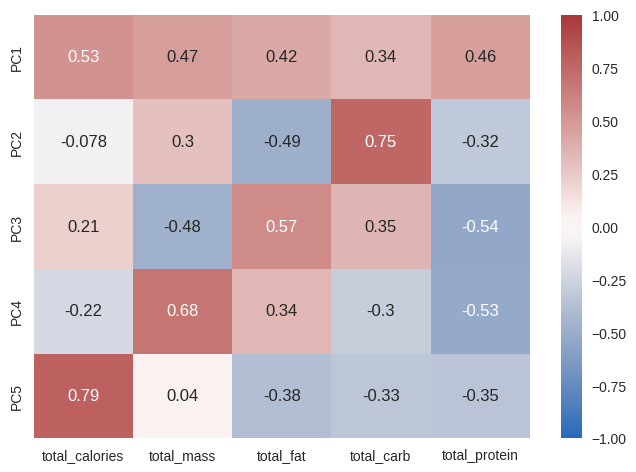

In [42]:
sns.heatmap(components_df, annot=True, cmap="vlag" , vmin=-1, vmax=1)

###Feature Importance

Let's look at the explained variance of the model and print the scree plot using [`psynlig`](https://psynlig.readthedocs.io/en/latest/).

In [43]:
!pip install psynlig

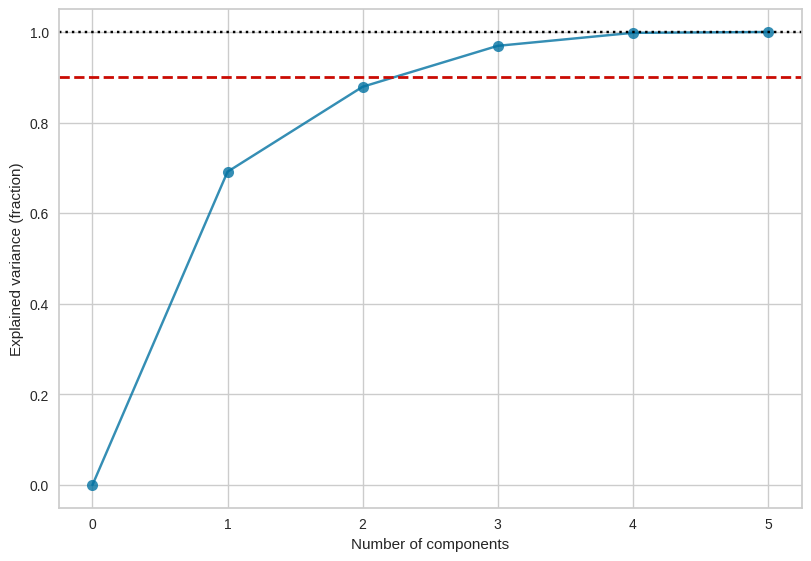

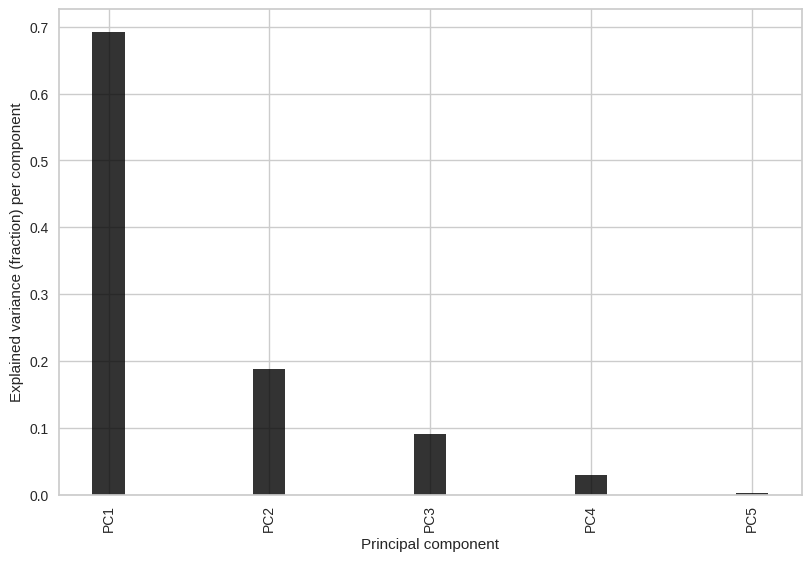

In [44]:
from matplotlib import pyplot as plt
from psynlig import (
    pca_explained_variance,
    pca_explained_variance_bar,
)

_, ax = pca_explained_variance(model,  marker='o', markersize=8, alpha=0.8)

# Let's add a line at an explained variance of 90%
ax.axhline(y=0.9, color='r', linestyle='--', linewidth=2)

plt.show()

pca_explained_variance_bar(
    model,
    width=0.2,
    alpha=0.8,
    color='black',
)

plt.show()

### Computing the Loadings

Let's plot the scaled version of these components by scaling each of the components in proportion to their standard deviations (i.e., square root of `model.explained_variance_`). This is called the **loadings**.

In [45]:
import numpy as np
loadings = components_df.mul(np.sqrt(model.explained_variance_), axis=0)

loadings_df = pd.DataFrame(loadings)
loadings_df

,total_calories,total_mass,total_fat,total_carb,total_protein
PC1,0.980489,0.865328,0.783778,0.633136,0.856293
PC2,-0.075475,0.286750,-0.472288,0.728836,-0.309957
PC3,0.141822,-0.319706,0.380673,0.233789,-0.360609
PC4,-0.085023,0.258962,0.128929,-0.112001,-0.199537
PC5,0.076878,0.003931,-0.037528,-0.032273,-0.033789


**Question:** If I move by 1 step along PC1, how many calories do I gain or lose?

Let's overlay the PCA components on top of the original features. We will use [`yellowbricks`](https://www.scikit-yb.org/en/latest/).

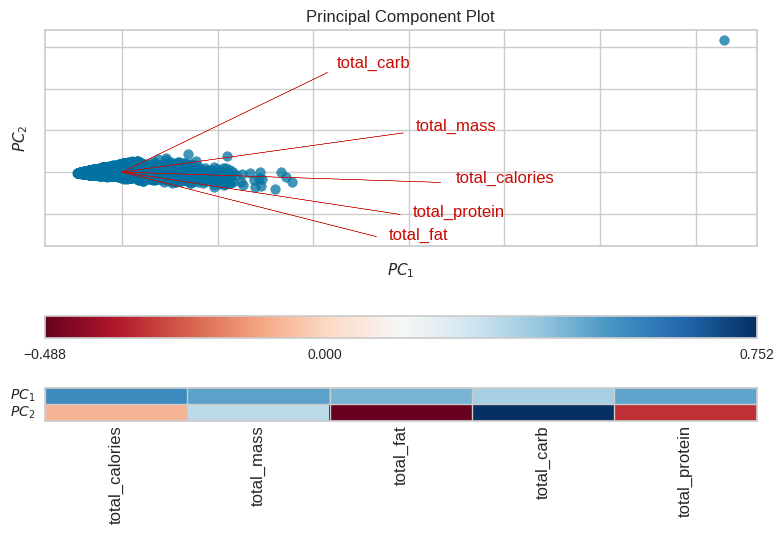

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [46]:
from yellowbrick.features import PCA as PCA_visualizer

visualizer = PCA_visualizer(featureslist=df_numeric.columns,
                            projection=2,
                            proj_features=True,
                            heatmap=True
                            )
visualizer.fit_transform(pd.DataFrame(normalized_data, columns=df_numeric.columns))
visualizer.show()

We could also use [`psynlig`](https://psynlig.readthedocs.io/en/latest/)

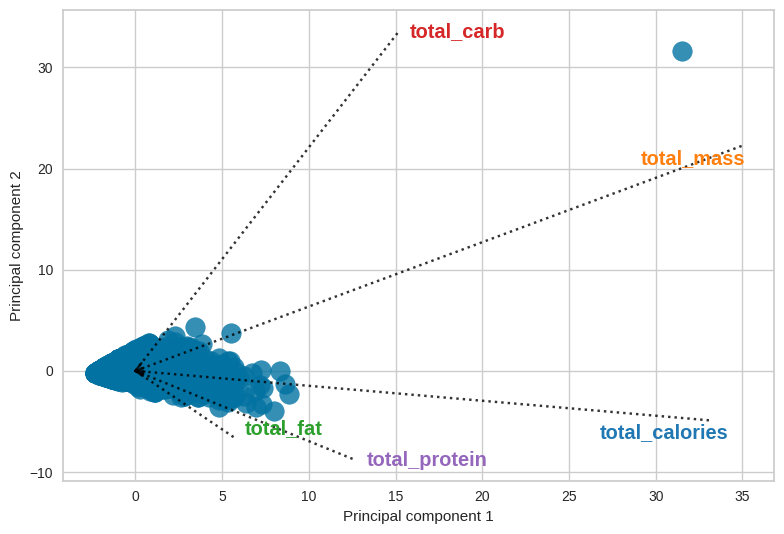

In [47]:
from psynlig import pca_2d_scores

loading_settings = {
    'adjust_text': True,
    'add_text': True,
}

pca_2d_scores(
    model,
    transformed_data,
    xvars=df_numeric.columns,
    select_components={(1, 2)},
    loading_settings=loading_settings,
    s=200,
    alpha=.8,
    cmap_class='Dark2',
)



plt.show()

Using `plotly` may help us with a more detailed investigation.

In [48]:
import plotly.express as px
import plotly.graph_objects as go

# add ingredients column for visualization
transformed_data_with_ingredients_df = pd.concat([transformed_data_df, df["ingredients"]], axis=1)

# Create a 3D scatter plot
fig = px.scatter_3d( #scatter_3d scatter
    transformed_data_with_ingredients_df,
    x="PC1",  # First principal component
    y="PC2",  # Second principal component
    z="PC3",  # Third principal component
    hover_name="ingredients",
)

fig.update_traces(
    marker=dict(
        size=2,  # Smaller marker size
        opacity=0.3  # Transparency (alpha)
    )
)


# Add an arrow for each original dimensions
for i, feature in enumerate(loadings_df.columns):
    fig.add_trace(
        go.Scatter3d(
            x=[0, loadings_df.loc["PC1", feature]],
            y=[0, loadings_df.loc["PC2", feature]],
            z=[0, loadings_df.loc["PC3", feature]],
            mode="lines",
            line=dict(color="red", width=3),
            showlegend=False,
        )
    )
    fig.add_trace(
        go.Scatter3d(
            x=[loadings_df.loc["PC1", feature]],
            y=[loadings_df.loc["PC2", feature]],
            z=[loadings_df.loc["PC3", feature]],
            mode="text",
            showlegend=False,
            text=[f"<b>{feature}</b>"],  # Bold text for better readability
            textfont=dict(size=12, color="red"),  # Match text color to the line
            textposition="middle right",  # Position the text more naturally
        )
    )

# Set axes ranges for easier display (removing outlier from display)
fig.update_layout(
    scene=dict(
        xaxis=dict(range=[-5, 10]),  # X-axis range
        yaxis=dict(range=[-5, 5]),   # Y-axis range
        zaxis=dict(range=[-2, 4])    # Z-axis range
    )
)

# Show the plot
fig.show()

## Clustering with and without PCA

###Outlier Removal

Let's remove the outliers first. That may help us get a better clustering. One way to do that is to find points with high reconstruction error after dimensionality reduction.

In [49]:
### First we do dimensionality reduction with 4 or fewer components
# Create the model
n=3
model = PCA(n)

#fit the data
model.fit(normalized_data)

# transform the data
transformed_data = model.transform(normalized_data)
transformed_data_df = pd.DataFrame(transformed_data)

# Rename the columns
transformed_data_df.columns = [f"PC{i+1}" for i in range(n)]

transformed_data_df

,PC1,PC2,PC3
0,-1.983384,-0.245837,0.148857
1,-2.233477,-0.161732,-0.026586
2,-1.719384,-0.255340,0.238282
3,-1.951667,0.033855,-0.094502
4,-2.236226,-0.154921,-0.040705
...,...,...,...
3255,-1.144072,0.523667,-0.626440
3256,-0.618935,0.915586,-0.748242
3257,2.579505,-0.144250,-2.475956
3258,4.458627,-1.414298,-0.863817


In [50]:
from sklearn.metrics import mean_squared_error

reconstructed_data = model.inverse_transform(transformed_data_df)

# Calculate reconstruction error (mean squared error)
reconstruction_errors = np.sqrt(mean_squared_error(normalized_data.T, reconstructed_data.T, multioutput='raw_values'))
# reconstruction_errors = np.mean((normalized_data - reconstructed_data) ** 2, axis=1) ### A second approach

Only keep indices that are within 3 standard deviation of error.

In [51]:
# Compute mean and standard deviation of the errors
mean_error = np.mean(reconstruction_errors)
std_error = np.std(reconstruction_errors)

# Filter indices within 3 standard deviations
valid_indices = np.where(np.abs(reconstruction_errors - mean_error) <= 3 * std_error)[0]

In [52]:
valid_indices.shape

(3216,)

Out of 3260 data points, we kept 3241.

###Clustering in Original Space

Let's compare clustering results with and without PCA

First, let's do the original data frame. After removing the outlier, we need to normalize again.

In [53]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
normalized_data = sc.fit_transform(df_numeric.iloc[valid_indices, :])
normalized_data

array([[-1.01461441, -1.17074556, -0.65252515, -1.05687556, -0.90806741],
       [-1.18569375, -1.25822241, -0.93552437, -1.12332603, -0.89641672],
       [-0.86829656, -0.99579188, -0.44313583, -0.95311402, -0.89695115],
       ...,
       [ 0.95162358,  2.35524412, -0.30389427,  0.05181466,  2.97214578],
       [ 2.42243635,  2.58402971,  2.2551414 ,  0.05181466,  2.97214535],
       [ 2.46119337,  2.6445906 ,  2.2551414 ,  0.14873484,  2.97455063]])

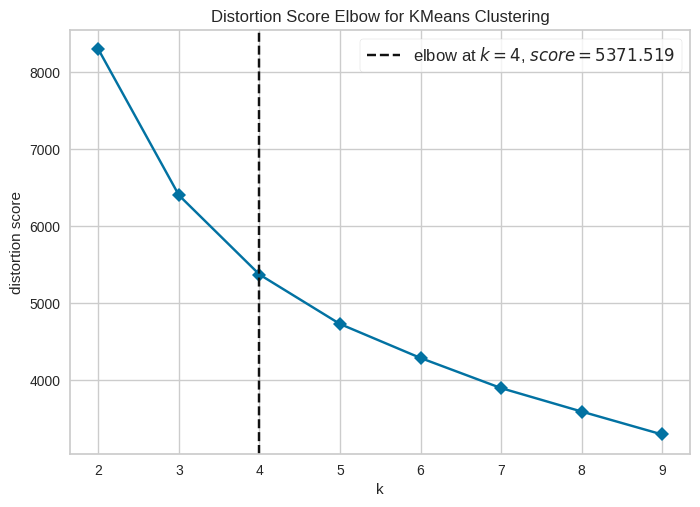

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(
    kmeans, k=(2,10), metric='distortion', timings=False #metric='silhouette' metric='distortion'
)

visualizer.fit(normalized_data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

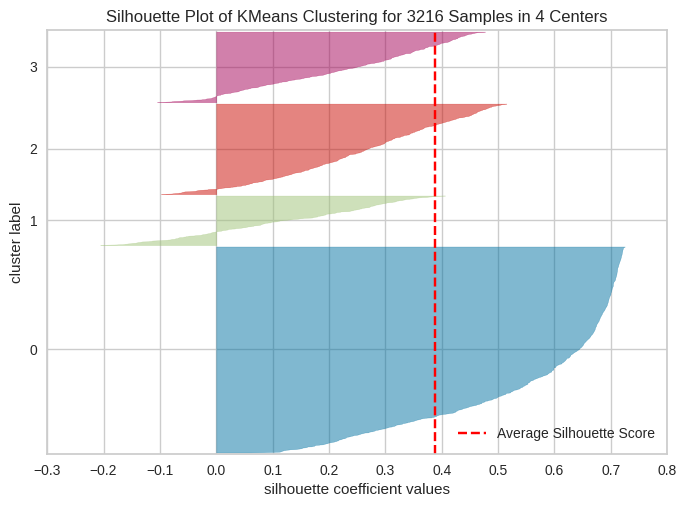

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 3216 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [55]:
from yellowbrick.cluster import SilhouetteVisualizer

kmeans = KMeans(4)

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(normalized_data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Let's plot the clusters.

In [56]:
df_original_withlabels = df.iloc[valid_indices]
df_original_withlabels["cluster_labels"] = kmeans.labels_

import plotly.express as px
fig = px.scatter_3d(df_original_withlabels, x='total_protein', y='total_carb', z='total_fat', color='cluster_labels', hover_name="ingredients",
                    opacity=0.5, color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_traces(marker=dict(size=3))  # Adjust the size to make dots smaller
fig.show()

<ipython-input-56-032a91484c36>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



###Clustering in a PCA-Low Dimensional Space

Let's now cluster with 3 major PC components.

In [91]:
from sklearn.decomposition import PCA
import pandas as pd

# Create the model
model = PCA(1)

#fit the data
model.fit(normalized_data)

# transform the data
transformed_data = model.transform(normalized_data)
transformed_data_df = pd.DataFrame(transformed_data)

# Rename the columns
transformed_data_df.columns = [f"PC{i+1}" for i in range(transformed_data_df.shape[1])]

transformed_data_df

,PC1
0,-2.127564
1,-2.396685
2,-1.840259
3,-2.074601
4,-2.401064
...,...
3211,-1.191236
3212,-0.589632
3213,2.835489
3214,4.817892


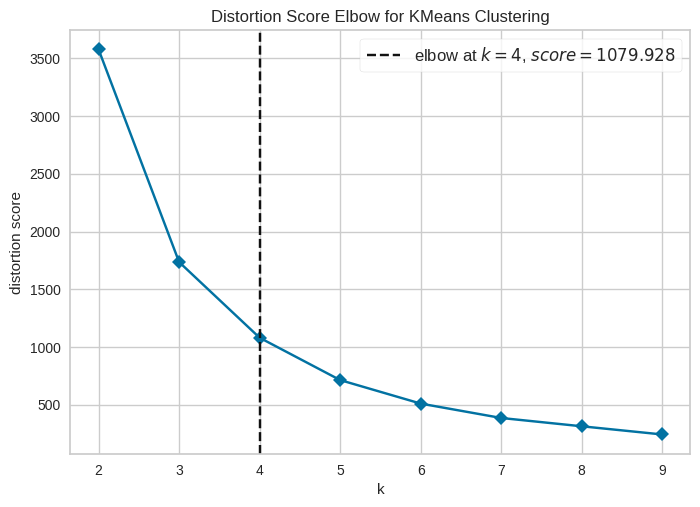

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [92]:
kmeans = KMeans()
visualizer = KElbowVisualizer(
    kmeans, k=(2,10), metric='distortion', timings=False #metric='silhouette' metric='distortion'
)

visualizer.fit(transformed_data_df)        # Fit the data to the visualizer
visualizer.show()

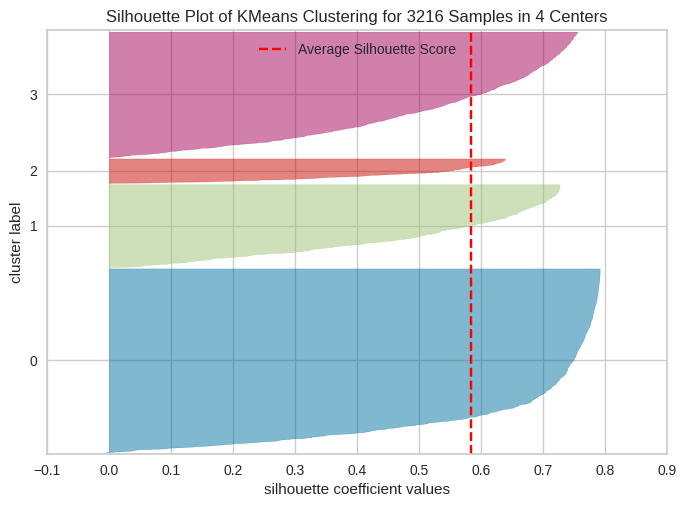

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 3216 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [96]:
kmeans = KMeans(4)

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(transformed_data_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Notice how much the clusters' silhouette scores have improved!

Let's plot these clusters in the original space. What filtering and transformations do we need?

In [97]:
df_copied = df.copy().iloc[valid_indices, :]
df_copied["cluster_labels"] = kmeans.labels_

import plotly.express as px
fig = px.scatter_3d(df_copied, x='total_protein', y='total_carb', z='total_fat', color='cluster_labels',
                    hover_name="ingredients",
                    opacity=0.5, color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_traces(marker=dict(size=3))  # Adjust the size to make dots smaller
fig.show()

Notice how the clustering result is different.

**Question:** What would the clusters look like if we intead visualize on the *reconstructed* data? Why?

In [99]:
df_PCA_withlabels = transformed_data_df
df_PCA_withlabels = model.inverse_transform(df_PCA_withlabels) # inverse transform PCA back to scaled feature space
df_PCA_withlabels = sc.inverse_transform(df_PCA_withlabels) # inverse transform scaled features back to original feature space
df_PCA_withlabels = pd.DataFrame(df_PCA_withlabels)
df_PCA_withlabels.columns = df_numeric.columns
df_PCA_withlabels["cluster_labels"] = kmeans.labels_

# Add ingredients column to the UMAP DataFrame for hover information
df_PCA_withlabels["ingredients"] = df["ingredients"][valid_indices].values

import plotly.express as px
fig = px.scatter_3d(df_PCA_withlabels, x='total_protein', y='total_carb', z='total_fat', color='cluster_labels',
                    hover_name="ingredients",
                    opacity=0.5, color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_traces(marker=dict(size=3))  # Adjust the size to make dots smaller
fig.show()

## UMAP

Finally, let's see if UMAP gives better results.

In [85]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.1 MB/s eta 0:00:00


In [100]:
import umap
import plotly.express as px

# Use UMAP to reduce the dimensionality of the data
reducer = umap.UMAP(n_components=3) # n_neighbors=15, min_dist=0.1
umap_embeddings = reducer.fit_transform(normalized_data)

# Create a DataFrame for the UMAP embeddings
umap_df = pd.DataFrame(umap_embeddings, columns=["UMAP1", "UMAP2", "UMAP3"]) #

# Add ingredients column to the UMAP DataFrame for hover information
umap_df["ingredients"] = df["ingredients"][valid_indices].values

# Create a 3D scatter plot with hover information
fig = px.scatter_3d(
    umap_df,
    x="UMAP1",
    y="UMAP2",
    z="UMAP3",
    hover_name="ingredients",  # Show ingredients on hover
    opacity=0.5,
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Customize marker size and opacity
fig.update_traces(marker=dict(size=3, opacity=0.7))

# Display the plot
fig.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



Let's try some clusterning on this embedding space.

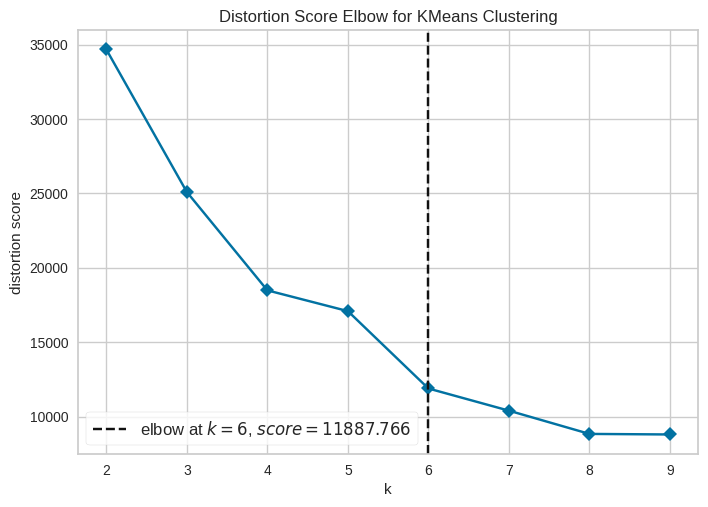

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [87]:
kmeans = KMeans()
visualizer = KElbowVisualizer(
    kmeans, k=(2,10), metric='distortion', timings=False #metric='silhouette' metric='distortion'
)

visualizer.fit(umap_embeddings)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

**Question:** What do you notice about the silhouette score if you try a large number of clusters? Can you explain your observation and judge whether it is a good idea to use  a lot of clusters?

In [101]:
kmeans = KMeans(6)
kmeans.fit(umap_embeddings)

umap_df_withlabels = pd.DataFrame(umap_embeddings)
umap_df_withlabels.columns = ["UMAP1", "UMAP2", "UMAP3"]
umap_df_withlabels["cluster_labels"] = kmeans.labels_
umap_df_withlabels["ingredients"] = df["ingredients"][valid_indices].values

import plotly.express as px
fig = px.scatter_3d(umap_df_withlabels, x='UMAP1', y='UMAP2', z='UMAP3', color='cluster_labels',
                    opacity=0.5,
                    hover_name="ingredients",
                    color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_traces(marker=dict(size=3))  # Adjust the size to make dots smaller
fig.show()

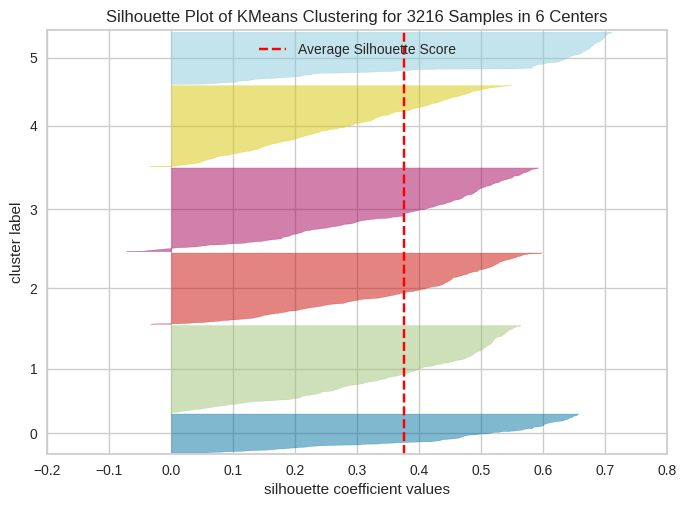

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 3216 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [90]:
kmeans = KMeans(6)

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(umap_embeddings)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

What does this clustering look like in the original space?

In [102]:
df_copied = df.copy().iloc[valid_indices, :]
df_copied["cluster_labels"] = kmeans.labels_

import plotly.express as px
fig = px.scatter_3d(df_copied, x='total_protein', y='total_carb', z='total_fat', color='cluster_labels', hover_name="ingredients",
                    opacity=0.5, color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_traces(marker=dict(size=3))  # Adjust the size to make dots smaller
fig.show()